# Escola Politécnica da Universidade de Sao Paulo
## Departamento de Engenharia de Sistemas Eletrônicos
### Processamento Estatistico de Sinais - PSI 3471

# Experiência 1 - Filtragem de um sinal ruidoso

### Beatriz Soares Passanezi - 10336167
### Lucas Penna Saraiva - 9770566

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from math import sin, pi, e, sqrt
from scipy import signal

### Questão 1

Gerando o sinal abaixo e amostrando em uma frequência de 40kHz.

Para definir o número de amostras, foi calculado que em uma frequência de 40kHz temos 40000/segundo e como vamos amostrar o sinal por 2s, teremos 2*40000 = 80000 amostras.

In [2]:
thau = 0.5
omega = 2*pi*500

#definindo a função que representa o sinal xo(t)
def xo(t):
    return (sin(omega*t)**3)*(e**(-t/thau))

x = np.vectorize(xo)

In [3]:
#definindo as amostras, o código abaixo me diz que para t eu preciso de 80000 amostras igualmente espaçadas entre 0 e 2
t = np.linspace(0, 2, 80000) 

In [4]:
xo = x(t)

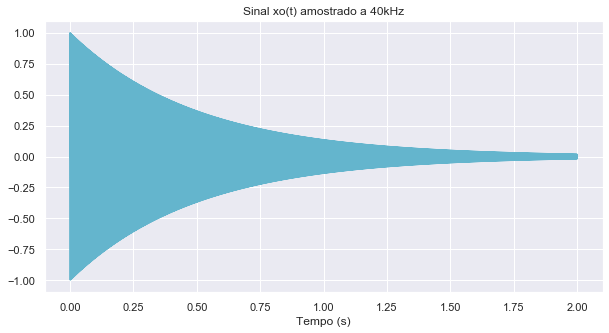

In [5]:
#definindo o gráfico de xo(t)

plt.figure(figsize=(10,5))
plt.plot(t, xo, 'c')
plt.title("Sinal xo(t) amostrado a 40kHz")
plt.xlabel("Tempo (s)")

plt.show()

### Questão 2

A questão 2 pede para introduzir no sinal um ruído gaussiano com SNR = 10dB.

Para obter esse ruído, primeiro foi calculada a potência média do sinal xo(t) para obtermos o valor da variância do ruído para que o SNR fosse de 10dB. Em seguida, foi criado um ruído de distribuição normal N(0, 1) a partir da função `randn` e ele foi multiplicado pela variância obtida anteriormente.

Finalmente, o sinal xo(n) foi somado ao ruído v(n) para a obtenção do sinal x(n).

In [6]:
#calculando a potência média de xo
power_x = np.sum(np.abs(xo)**2)/len(xo)

#calculando a variância para obter SNR = 10dB
SNR = 10
sv = sqrt(power_x*(10**(-SNR/10)))

#gerando o ruído 
v = np.random.randn(len(xo))*sv

#somando o sinal xo com o ruído
x = xo + v

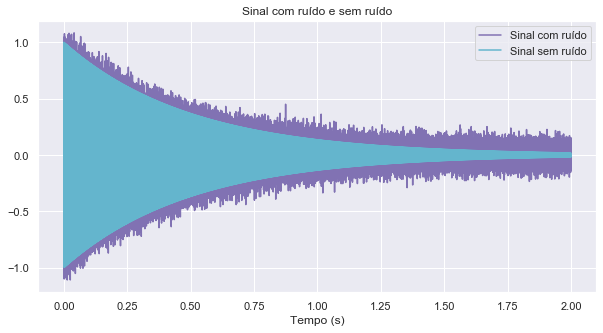

In [7]:
#definindo o gráfico de x(n)

plt.figure(figsize=(10,5))
plt.plot(t, x, 'm', label="Sinal com ruído")
plt.plot(t, xo, 'c', label="Sinal sem ruído")

plt.title("Sinal com ruído e sem ruído")
plt.xlabel("Tempo (s)")
plt.legend(loc="upper right")

plt.show()

### Questão 3

Na questão 3 é pedido que se crie um filtro com resposta ao impulso o `h[n] = 0,1 sinc (0,1(n − 50))` para `0 <= n <= 100` e em seguida calcular a resposta em frequência e plotar os respectivos gráficos.

Para calcular o filtro, primeiro foi definido o vetor `n` com valores inteiros entre 0 e 100 e calculado o filtro `h[n]` a partir desses valores de n. Em seguida, a resposta em frequência foi calculada a partir da função `freqz` da biblioteca `scipy` do Python. Essa função retorna os valores imaginários da reposta em frequência, então para plotar o gráfico, usamos o valor absoluto desses valores.

In [8]:
#definindo o vetor n de 0 a 100
n = np.array(range(101))

#definindo o filtro pedido
filter_h = 0.1*np.sinc(0.1*(n - 50))

In [9]:
#calculando a resposta em frequência do filtro h[n] definido acima
w, h = signal.freqz(filter_h)

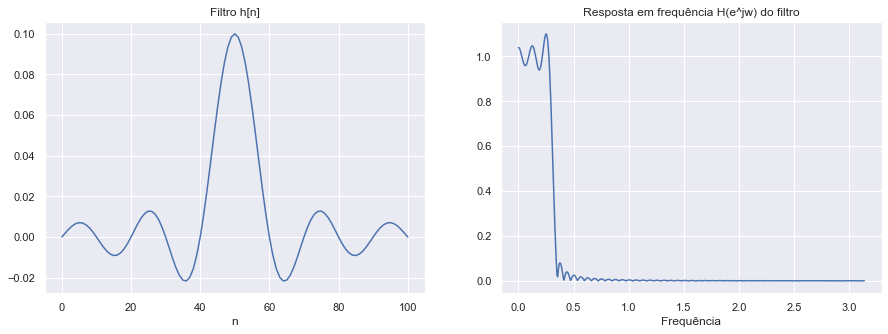

In [10]:
#plotando o filtro pedido e sua resposta em frequência
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(n, filter_h)
ax2.plot(w, abs(h))

ax1.set_title("Filtro h[n]")
ax1.set_xlabel("n")

ax2.set_title("Resposta em frequência H(e^jw) do filtro")
ax2.set_xlabel("Frequência")

plt.show()

### Questão 4

Na questão 4 foi pedido para passar o sinal `x[n]` pelo filtro criado na questão 3 obtendo o sinal `y[n]`.

In [11]:
#filtrando o sinal x pelo filtro criado acima
y = signal.lfilter(b=filter_h, a=1, x=x)

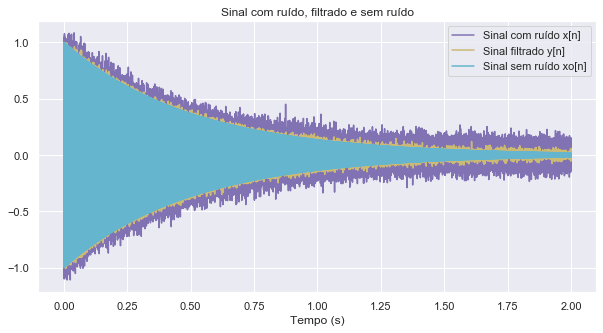

In [12]:
#definindo o gráfico de y(n)

plt.figure(figsize=(10,5))
plt.plot(t, x, 'm', label="Sinal com ruído x[n]")
plt.plot(t, y, 'y', label="Sinal filtrado y[n]")
plt.plot(t, xo, 'c', label="Sinal sem ruído xo[n]")

plt.title("Sinal com ruído, filtrado e sem ruído")
plt.xlabel("Tempo (s)")
plt.legend(loc="upper right")

plt.show()

### Questão 5

Para verificar que **X[n]** e **Y[n]** nao sao estacionarios no sentido amplo, basta verificar que a média e a funçao de autocorrelaçao, para duas janelas temporais diferentes, de mesmo cumprimento, nao sao constantes.

#### 5.1 Verificaçao da Media intervalos de x

In [13]:
x_1 = x[0:1000]
x_2 = x[1000:2000]
x_3 = x[2000:3000]
x_4 = x[3000:4000]
x_5 = x[4000:5000]
x_6 = x[5000:6000]
x_7 = x[6000:7000]
x_8 = x[7000:8000]

print(f"A média do 1o intervalo de x[n] vale: {x_1.mean()}")
print(f"A média do 2o intervalo de x[n] vale: {x_2.mean()}")
print(f"A média do 3o intervalo de x[n] vale: {x_3.mean()}")
print(f"A média do 4o intervalo de x[n] vale: {x_4.mean()}")
print(f"A média do 5o intervalo de x[n] vale: {x_5.mean()}")
print(f"A média do 6o intervalo de x[n] vale: {x_6.mean()}")
print(f"A média do 7o intervalo de x[n] vale: {x_7.mean()}")
print(f"A média do 8o intervalo de x[n] vale: {x_8.mean()}")


A média do 1o intervalo de x[n] vale: 0.014918213733329286
A média do 2o intervalo de x[n] vale: -0.02286446345739945
A média do 3o intervalo de x[n] vale: 0.012996323260890934
A média do 4o intervalo de x[n] vale: -0.00997195029732077
A média do 5o intervalo de x[n] vale: 0.014608488852743583
A média do 6o intervalo de x[n] vale: -0.01299082918001547
A média do 7o intervalo de x[n] vale: 0.009764191833447393
A média do 8o intervalo de x[n] vale: -0.011969791936090978


#### 5.2 Verificacao da Autocorrelacao de x

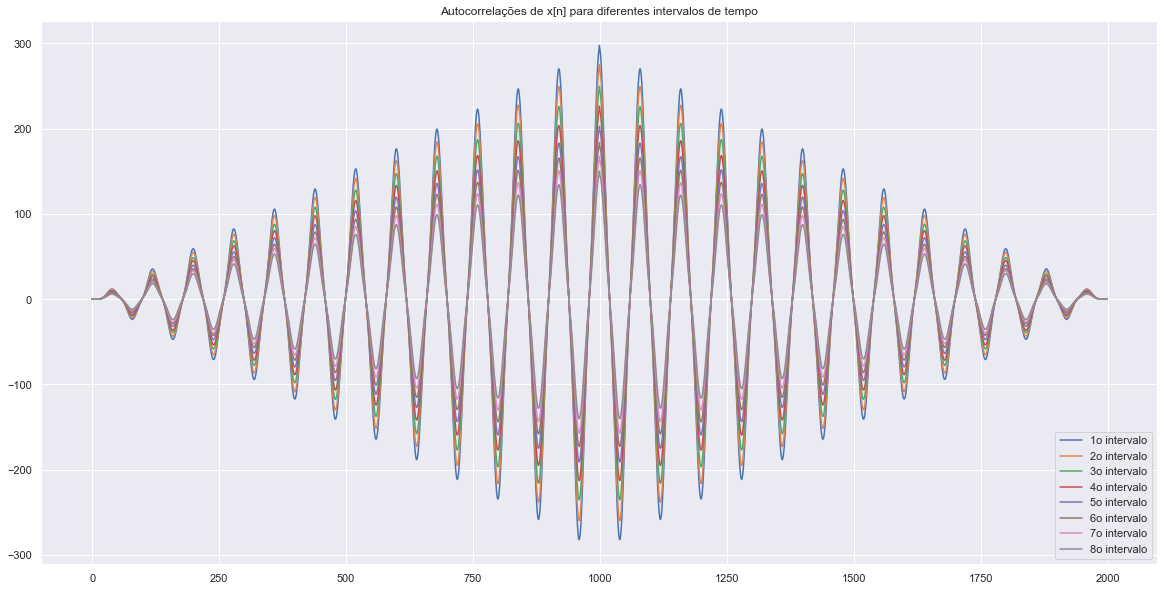

In [14]:
plt.figure(figsize=(20,10))

plt.plot(np.correlate(x_1, x_1, mode='full'), label="1o intervalo")
plt.plot(np.correlate(x_2, x_2, mode='full'), label="2o intervalo")
plt.plot(np.correlate(x_3, x_3, mode='full'), label="3o intervalo")
plt.plot(np.correlate(x_4, x_4, mode='full'), label="4o intervalo")
plt.plot(np.correlate(x_5, x_5, mode='full'), label="5o intervalo")
plt.plot(np.correlate(x_6, x_6, mode='full'), label="6o intervalo")
plt.plot(np.correlate(x_7, x_7, mode='full'), label="7o intervalo")
plt.plot(np.correlate(x_8, x_8, mode='full'), label="8o intervalo")

plt.title("Autocorrelações de x[n] para diferentes intervalos de tempo")
plt.legend(loc="lower right")

### 5.3 Médias de Y

In [15]:
y_1 = y[0:1000]
y_2 = y[1000:2000]
y_3 = y[2000:3000]
y_4 = y[3000:4000]
y_5 = y[4000:5000]
y_6 = y[5000:6000]
y_7 = y[6000:7000]
y_8 = y[7000:8000]

print(f"A média do 1o intervalo de y[n] vale: {y_1.mean()}")
print(f"A média do 2o intervalo de y[n] vale: {y_2.mean()}")
print(f"A média do 3o intervalo de y[n] vale: {y_3.mean()}")
print(f"A média do 4o intervalo de y[n] vale: {y_4.mean()}")
print(f"A média do 5o intervalo de y[n] vale: {y_5.mean()}")
print(f"A média do 6o intervalo de y[n] vale: {y_6.mean()}")
print(f"A média do 7o intervalo de y[n] vale: {y_7.mean()}")
print(f"A média do 8o intervalo de y[n] vale: {y_8.mean()}")

A média do 1o intervalo de y[n] vale: 0.00020490568255074492
A média do 2o intervalo de y[n] vale: 0.006587202924775314
A média do 3o intervalo de y[n] vale: -0.015384044256022565
A média do 4o intervalo de y[n] vale: 0.01717522929079729
A média do 5o intervalo de y[n] vale: -0.01178982394708614
A média do 6o intervalo de y[n] vale: 0.01154320492608615
A média do 7o intervalo de y[n] vale: -0.013289990342375317
A média do 8o intervalo de y[n] vale: 0.009966461395122913


### 5.4 Função de Autocorrelação de Y (intervalos)

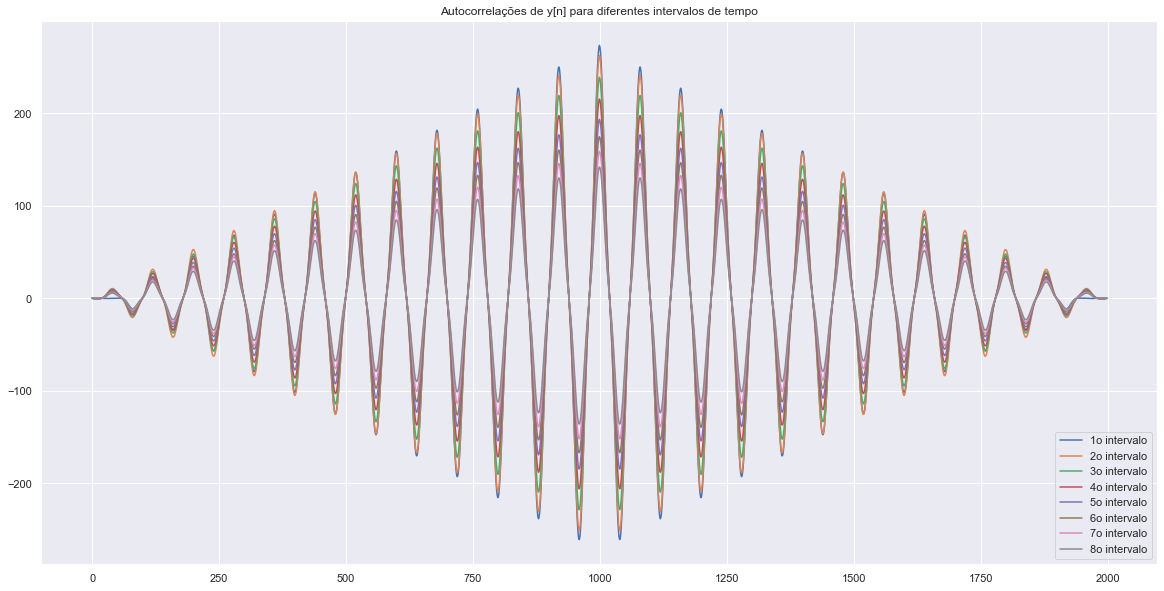

In [16]:
plt.figure(figsize=(20,10))

plt.plot(np.correlate(y_1, y_1, mode='full'), label="1o intervalo")
plt.plot(np.correlate(y_2, y_2, mode='full'), label="2o intervalo")
plt.plot(np.correlate(y_3, y_3, mode='full'), label="3o intervalo")
plt.plot(np.correlate(y_4, y_4, mode='full'), label="4o intervalo")
plt.plot(np.correlate(y_5, y_5, mode='full'), label="5o intervalo")
plt.plot(np.correlate(y_6, y_6, mode='full'), label="6o intervalo")
plt.plot(np.correlate(y_7, y_7, mode='full'), label="7o intervalo")
plt.plot(np.correlate(y_8, y_8, mode='full'), label="8o intervalo")

plt.title("Autocorrelações de y[n] para diferentes intervalos de tempo")
plt.legend(loc="lower right")

### 5.5 Médias do ruído vx

In [17]:
v_1 = v[0:1000]
v_2 = v[1000:2000]
v_3 = v[2000:3000]
v_4 = v[3000:4000]
v_5 = v[4000:5000]
v_6 = v[5000:6000]
v_7 = v[6000:7000]
v_8 = v[7000:8000]

print(v_1.mean())
print(v_2.mean())
print(v_3.mean())
print(v_4.mean())
print(v_5.mean())
print(v_6.mean())
print(v_7.mean())
print(v_8.mean())

-0.0016441294092918346
-0.0071098753875223275
-0.0019899043596196793
0.004283390208936158
0.0010483897127521514
-9.206411402909898e-05
-0.0025054927795768425
-0.00029850717658554647


### 5.6 Autocorrelações de vx

(0, 0.4)

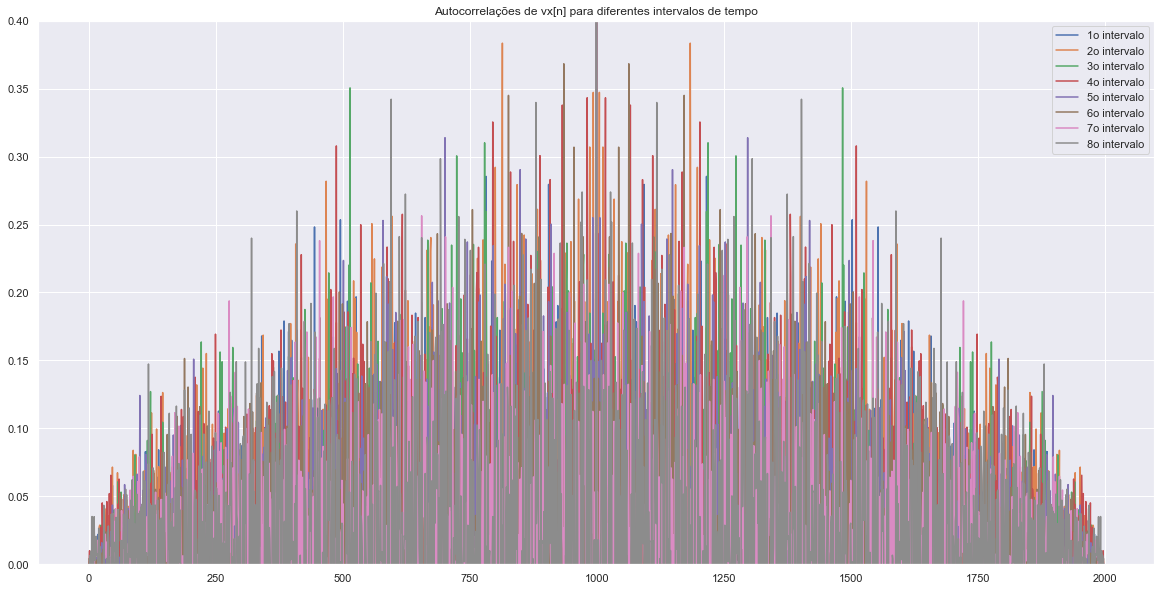

In [18]:
plt.figure(figsize=(20,10))

plt.plot(np.correlate(v_1, v_1, mode='full'), label="1o intervalo")
plt.plot(np.correlate(v_2, v_2, mode='full'), label="2o intervalo")
plt.plot(np.correlate(v_3, v_3, mode='full'), label="3o intervalo")
plt.plot(np.correlate(v_4, v_4, mode='full'), label="4o intervalo")
plt.plot(np.correlate(v_5, v_5, mode='full'), label="5o intervalo")
plt.plot(np.correlate(v_6, v_6, mode='full'), label="6o intervalo")
plt.plot(np.correlate(v_7, v_7, mode='full'), label="7o intervalo")
plt.plot(np.correlate(v_8, v_8, mode='full'), label="8o intervalo")

plt.title("Autocorrelações de vx[n] para diferentes intervalos de tempo")
plt.legend(loc="upper right")
plt.ylim(0, 0.4)

In [19]:
v_1 = v[0:100]
v_2 = v[100:200]
v_3 = v[200:300]
v_4 = v[300:400]
v_5 = v[400:500]
v_6 = v[500:600]
v_7 = v[600:700]
v_8 = v[700:800]

(0, 0.1)

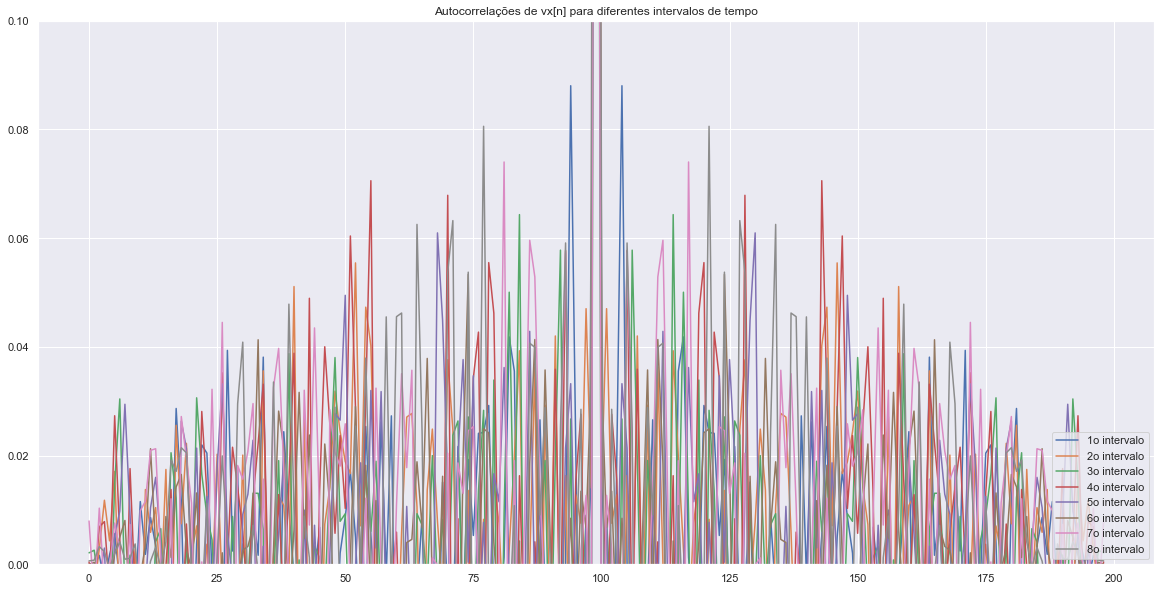

In [20]:
plt.figure(figsize=(20,10))

plt.plot(np.correlate(v_1, v_1, mode='full'), label="1o intervalo")
plt.plot(np.correlate(v_2, v_2, mode='full'), label="2o intervalo")
plt.plot(np.correlate(v_3, v_3, mode='full'), label="3o intervalo")
plt.plot(np.correlate(v_4, v_4, mode='full'), label="4o intervalo")
plt.plot(np.correlate(v_5, v_5, mode='full'), label="5o intervalo")
plt.plot(np.correlate(v_6, v_6, mode='full'), label="6o intervalo")
plt.plot(np.correlate(v_7, v_7, mode='full'), label="7o intervalo")
plt.plot(np.correlate(v_8, v_8, mode='full'), label="8o intervalo")

plt.title("Autocorrelações de vx[n] para diferentes intervalos de tempo")
plt.legend(loc="lower right")
plt.ylim(0, 0.1)

### 5.7 Médias de Vy

In [21]:
vy = signal.lfilter(b=filter_h, a=1, x=v)

In [22]:
vy_1 = vy[0:1000]
vy_2 = vy[1000:2000]
vy_3 = vy[2000:3000]
vy_4 = vy[3000:4000]
vy_5 = vy[4000:5000]
vy_6 = vy[5000:6000]
vy_7 = vy[6000:7000]
vy_8 = vy[7000:8000]

print(vy_1.mean())
print(vy_2.mean())
print(vy_3.mean())
print(vy_4.mean())
print(vy_5.mean())
print(vy_6.mean())
print(vy_7.mean())
print(vy_8.mean())

-0.0017642024939974745
-0.006797633442326335
-0.0026438865705088067
0.00504872758727133
-0.000247446950489566
0.0005568411572914964
-0.002832879926039581
1.3131139324094765e-05


### 5.8 Autocorrelações de Vy

(0, 0.1)

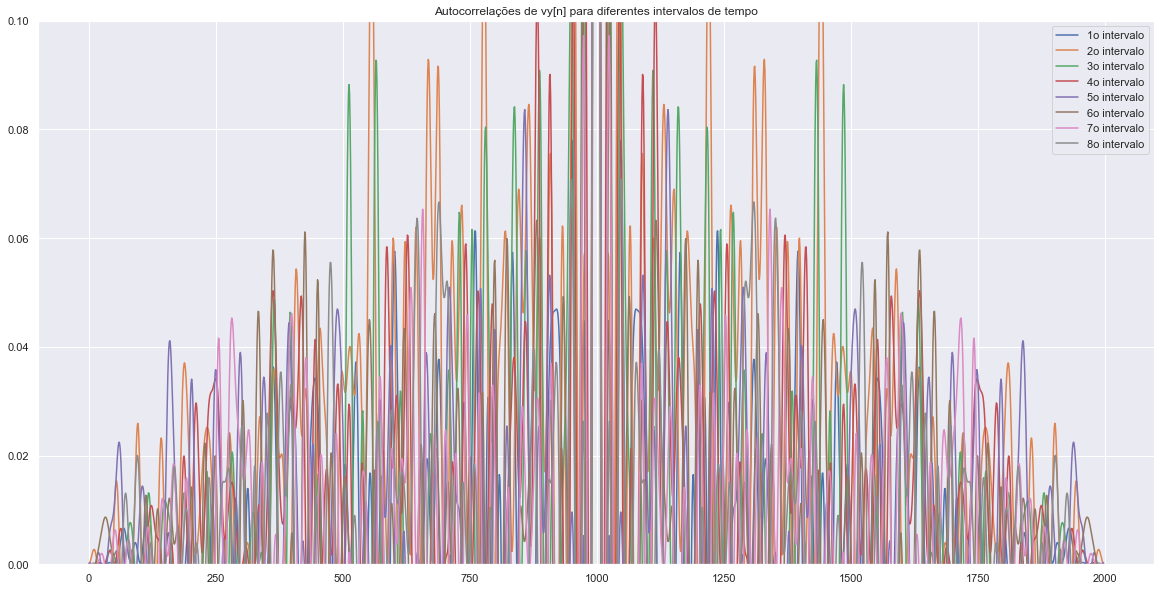

In [23]:
plt.figure(figsize=(20,10))

plt.plot(np.correlate(vy_1, vy_1, mode='full'), label="1o intervalo")
plt.plot(np.correlate(vy_2, vy_2, mode='full'), label="2o intervalo")
plt.plot(np.correlate(vy_3, vy_3, mode='full'), label="3o intervalo")
plt.plot(np.correlate(vy_4, vy_4, mode='full'), label="4o intervalo")
plt.plot(np.correlate(vy_5, vy_5, mode='full'), label="5o intervalo")
plt.plot(np.correlate(vy_6, vy_6, mode='full'), label="6o intervalo")
plt.plot(np.correlate(vy_7, vy_7, mode='full'), label="7o intervalo")
plt.plot(np.correlate(vy_8, vy_8, mode='full'), label="8o intervalo")

plt.title("Autocorrelações de vy[n] para diferentes intervalos de tempo")
plt.legend(loc="upper right")
plt.ylim(0, 0.1)

In [24]:
vy_1 = vy[0:100]
vy_2 = vy[100:200]
vy_3 = vy[200:300]
vy_4 = vy[300:400]
vy_5 = vy[400:500]
vy_6 = vy[500:600]
vy_7 = vy[600:700]
vy_8 = vy[700:800]

(0, 0.05)

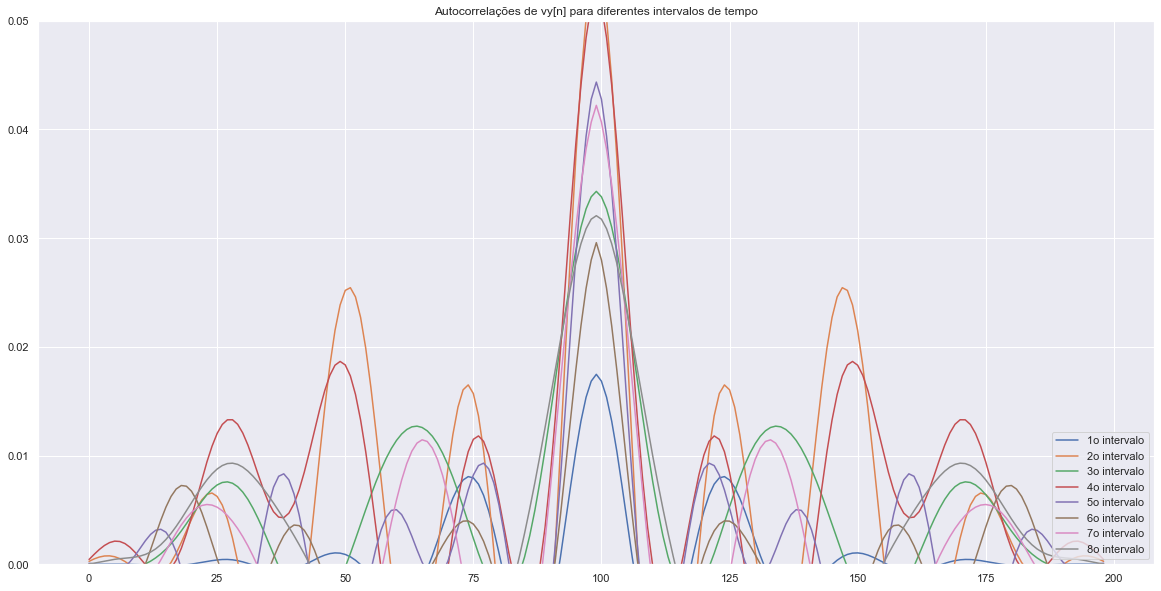

In [25]:
plt.figure(figsize=(20,10))

plt.plot(np.correlate(vy_1, vy_1, mode='full'), label="1o intervalo")
plt.plot(np.correlate(vy_2, vy_2, mode='full'), label="2o intervalo")
plt.plot(np.correlate(vy_3, vy_3, mode='full'), label="3o intervalo")
plt.plot(np.correlate(vy_4, vy_4, mode='full'), label="4o intervalo")
plt.plot(np.correlate(vy_5, vy_5, mode='full'), label="5o intervalo")
plt.plot(np.correlate(vy_6, vy_6, mode='full'), label="6o intervalo")
plt.plot(np.correlate(vy_7, vy_7, mode='full'), label="7o intervalo")
plt.plot(np.correlate(vy_8, vy_8, mode='full'), label="8o intervalo")

plt.title("Autocorrelações de vy[n] para diferentes intervalos de tempo")
plt.legend(loc="lower right")
plt.ylim(0, 0.05)

### Questão 6

#### Item A.a

- Cálculo da Potência de Vx (L processos)

In [56]:
L=10000
n_f = 110
n_o = 100

In [57]:
list_processos = []

from IPython.display import clear_output

for n in range(n_o, n_f):
    
    clear_output(wait=False)
    print("Iteração: ", n)
    
    list_processo = []
    
    for l in range(0, L):
            
        v = np.random.randn(len(xo))*sv
        list_processo.append(v[n])

    list_processos.append(list_processo)

Iteração:  109


In [58]:
list_processos = np.array(list_processos)

In [59]:
potencias = []

for n in range(0, n_f-n_o):
    
    potencias.append(sum(list_processos[n]**2)/L)

In [60]:
potencias

[0.0038266651929340276,
 0.0039056468582324214,
 0.003972717812628631,
 0.004020156232374171,
 0.00395343228273817,
 0.003891989308990917,
 0.003864178908761093,
 0.003910423503573019,
 0.0038532238935101134,
 0.003942516798522508]

#### Item A.b

- Cálculo da Potência de Vy (L processos)

In [61]:
L=10000
n_f = 110
n_o = 100

In [62]:
list_processos = []

from IPython.display import clear_output

for n in range(n_o, n_f):
    
    clear_output(wait=False)
    print("Iteração: ", n)
    
    list_processo = []
    
    for l in range(0, L):
            
        v = np.random.randn(len(xo))*sv
        v = signal.lfilter(b=filter_h, a=1, x=v)
        list_processo.append(v[n])

    list_processos.append(list_processo)

Iteração:  109


In [63]:
list_processos = np.array(list_processos)

In [64]:
potencias = []

for n in range(0, n_f-n_o):
    
    potencias.append(sum(list_processos[n]**2)/L)

In [65]:
potencias

[0.0003822380859636893,
 0.0003816508629222729,
 0.00038569520512354643,
 0.0003818944548276971,
 0.0003846286777260965,
 0.00038119690774819425,
 0.00038704237477244445,
 0.00038243251421261204,
 0.00037614633647429775,
 0.00038613537160860843]

#### Item B.a
- Cálculo da Potência de Vx (N periodos)

In [106]:
N = 78000

In [107]:
v = np.random.randn(len(xo))*sv

In [108]:
v = v[:N]

In [109]:
sum(v**2)/N

0.003908645419453568

#### Item B.b
- Cálculo da Potência de Vy (N periodos)

In [110]:
N = 78000

In [111]:
v = np.random.randn(len(xo))*sv
v = signal.lfilter(b=filter_h, a=1, x=v)

In [112]:
v = v[:N]

In [113]:
sum(v**2)/N

0.0003894271227963707